In [106]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV, RidgeCV, Ridge
from sklearn.model_selection import KFold, cross_val_score

In [107]:
matFile = sio.loadmat("cs.mat")["img"]
matFile

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(50, 50), dtype=uint32)

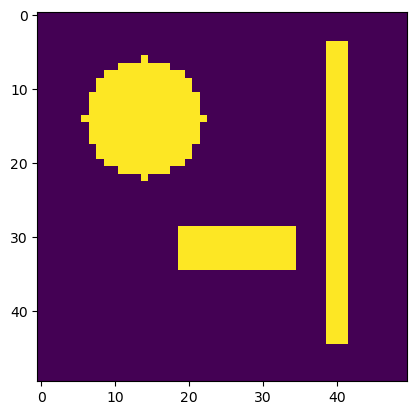

In [108]:
plt.imshow(matFile)

In [109]:
X = matFile.flatten()
X.shape

(2500,)

### Part 1 Lasso

In [110]:
# Create weight matrix and epsilon vector
np.random.seed(123)
w = np.random.normal(0, 1, (1300, 2500))
epsilon = np.random.normal(0, np.sqrt(25), 1300)
w.shape
epsilon.shape

(1300,)

In [111]:
y = w @ X + epsilon

lambdas = np.logspace(-3, 0.1, 25)
mse_lst = []

clf = LassoCV(alphas=lambdas, cv=10, random_state=42).fit(w, y)
mse_lst.append(np.mean(clf.mse_path_, axis=1))

In [112]:
mse_lst = np.array(mse_lst[0])

Text(0.5, 1.0, 'Lasso CV Error Curve')

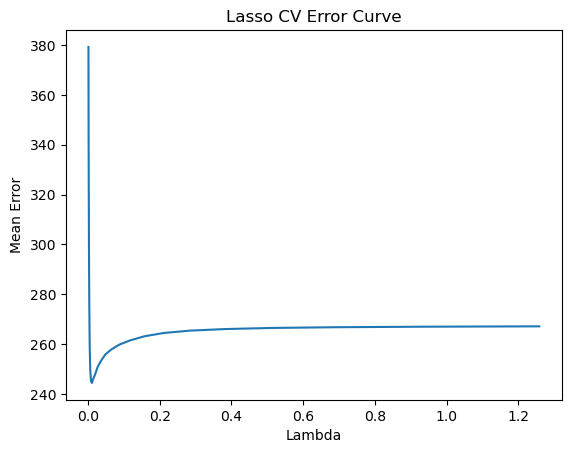

In [113]:
plt.plot(lambdas, mse_lst)
plt.xlabel("Lambda")
plt.ylabel("Mean Error")
plt.title("Lasso CV Error Curve")

In [114]:
x_vals = clf.coef_
x_vals.shape

(2500,)

(np.float64(-0.5), np.float64(49.5), np.float64(49.5), np.float64(-0.5))

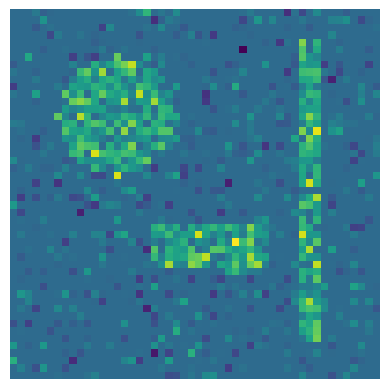

In [115]:
x_reshaped = x_vals.reshape((50, 50))

plt.imshow(x_reshaped)
plt.axis("off")

In [116]:
mean_mse = np.mean(clf.mse_path_, axis=1)
alphas_tested = clf.alphas_

best_indx = np.argmin(mean_mse)
best_alpha = alphas_tested[best_indx]
best_alpha

np.float64(0.11659144011798322)

### Part 2 Ridge

In [ ]:
lambdas = np.logspace(-3, 2.6, 50)
ridge_mse_lst = []

cv_Kf = KFold(n_splits=10, shuffle=True, random_state=123)

for val in lambdas:
    ridge_clf = RidgeCV(alphas=val).fit(w, y)
    score = cross_val_score(ridge_clf, w, y, scoring="neg_mean_squared_error", cv=cv_Kf)
    ridge_mse_lst.append(-np.mean(score))

Text(0.5, 1.0, 'Ridge CV Error Curve')

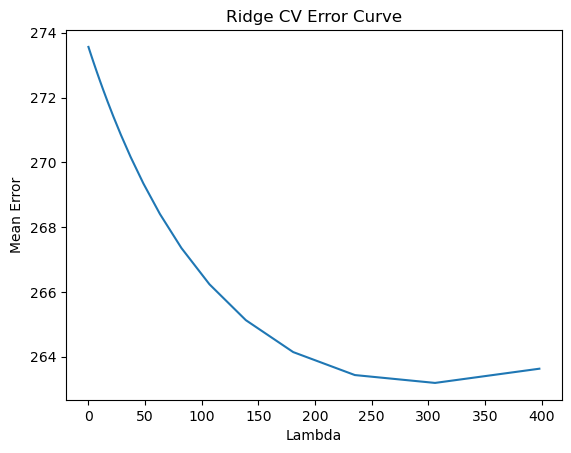

In [118]:
plt.plot(lambdas, ridge_mse_lst)
plt.xlabel("Lambda")
plt.ylabel("Mean Error")
plt.title("Ridge CV Error Curve")

In [119]:
best_indx = np.argmin(ridge_mse_lst)
best_alpha = lambdas[best_indx]
best_alpha

np.float64(305.9949687207196)

(np.float64(-0.5), np.float64(49.5), np.float64(49.5), np.float64(-0.5))

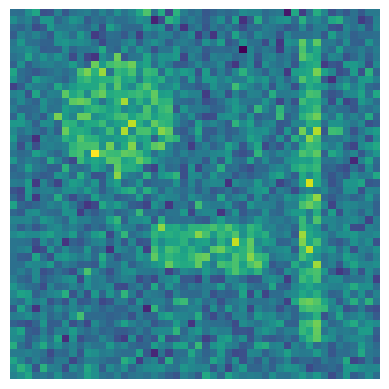

In [120]:
ridge_clf = Ridge(alpha=best_alpha).fit(w, y)
ridge_x_vals = ridge_clf.coef_
ridge_x_reshaped = ridge_x_vals.reshape((50, 50))
ridge_x_reshaped.shape
plt.imshow(ridge_x_reshaped)
plt.axis("off")

(np.float64(-0.5), np.float64(49.5), np.float64(49.5), np.float64(-0.5))

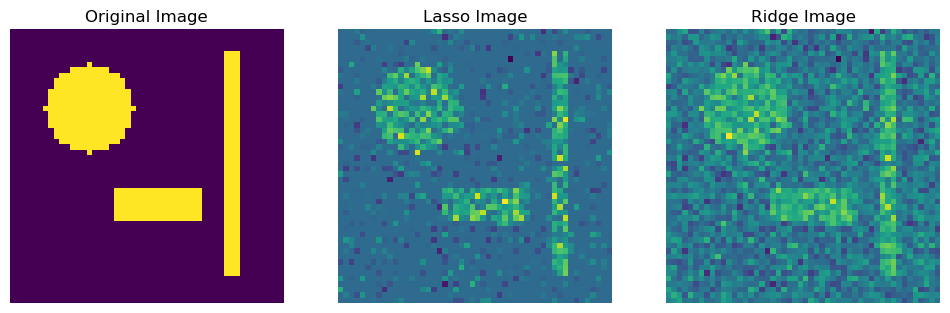

In [121]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(matFile)
axs[0].set_title("Original Image")
axs[0].axis("off")

axs[1].imshow(x_reshaped)
axs[1].set_title("Lasso Image")
axs[1].axis("off")

axs[2].imshow(ridge_x_reshaped)
axs[2].set_title("Ridge Image")
axs[2].axis("off")